# Implementation of Classification Models

In [1]:
# Loading libraries
import pandas as pd
from sklearn import metrics 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## Exploratory

In [2]:
#importing the dataset
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

# No categorical variables present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
"YES" if df.isnull().any().any() else "NO"

# Are there any null values?

'NO'

In [6]:
feature_cols = df.columns.drop('y')
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [7]:
# TEST-TRAIN split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

## Decision Tree Classification Model

In [8]:
clf = DecisionTreeClassifier()
#Training
clf = clf.fit(X_train,y_train)
#Predicting
y_pred = clf.predict(X_test)

### Evaluating the Model

In [22]:
y_train_pred = clf.predict(X_train)

pred_test = clf.predict(X_test)
print("BEFORE TUNING:\n")
print("RECALL\t\t",recall_score(y_test, pred_test))     
print("PRECISION\t",precision_score(y_test, pred_test))  
print("ROC_AUC\t\t",roc_auc_score(y_test, pred_test))    
print("\nACCURACY SCORE\t",metrics.accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:",confusion_matrix(y_test,pred_test),sep="\n")

BEFORE TUNING:

RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319

ACCURACY SCORE	 0.935672514619883

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]


In [10]:
# %pip install pydotplus
# %pip install graphviz

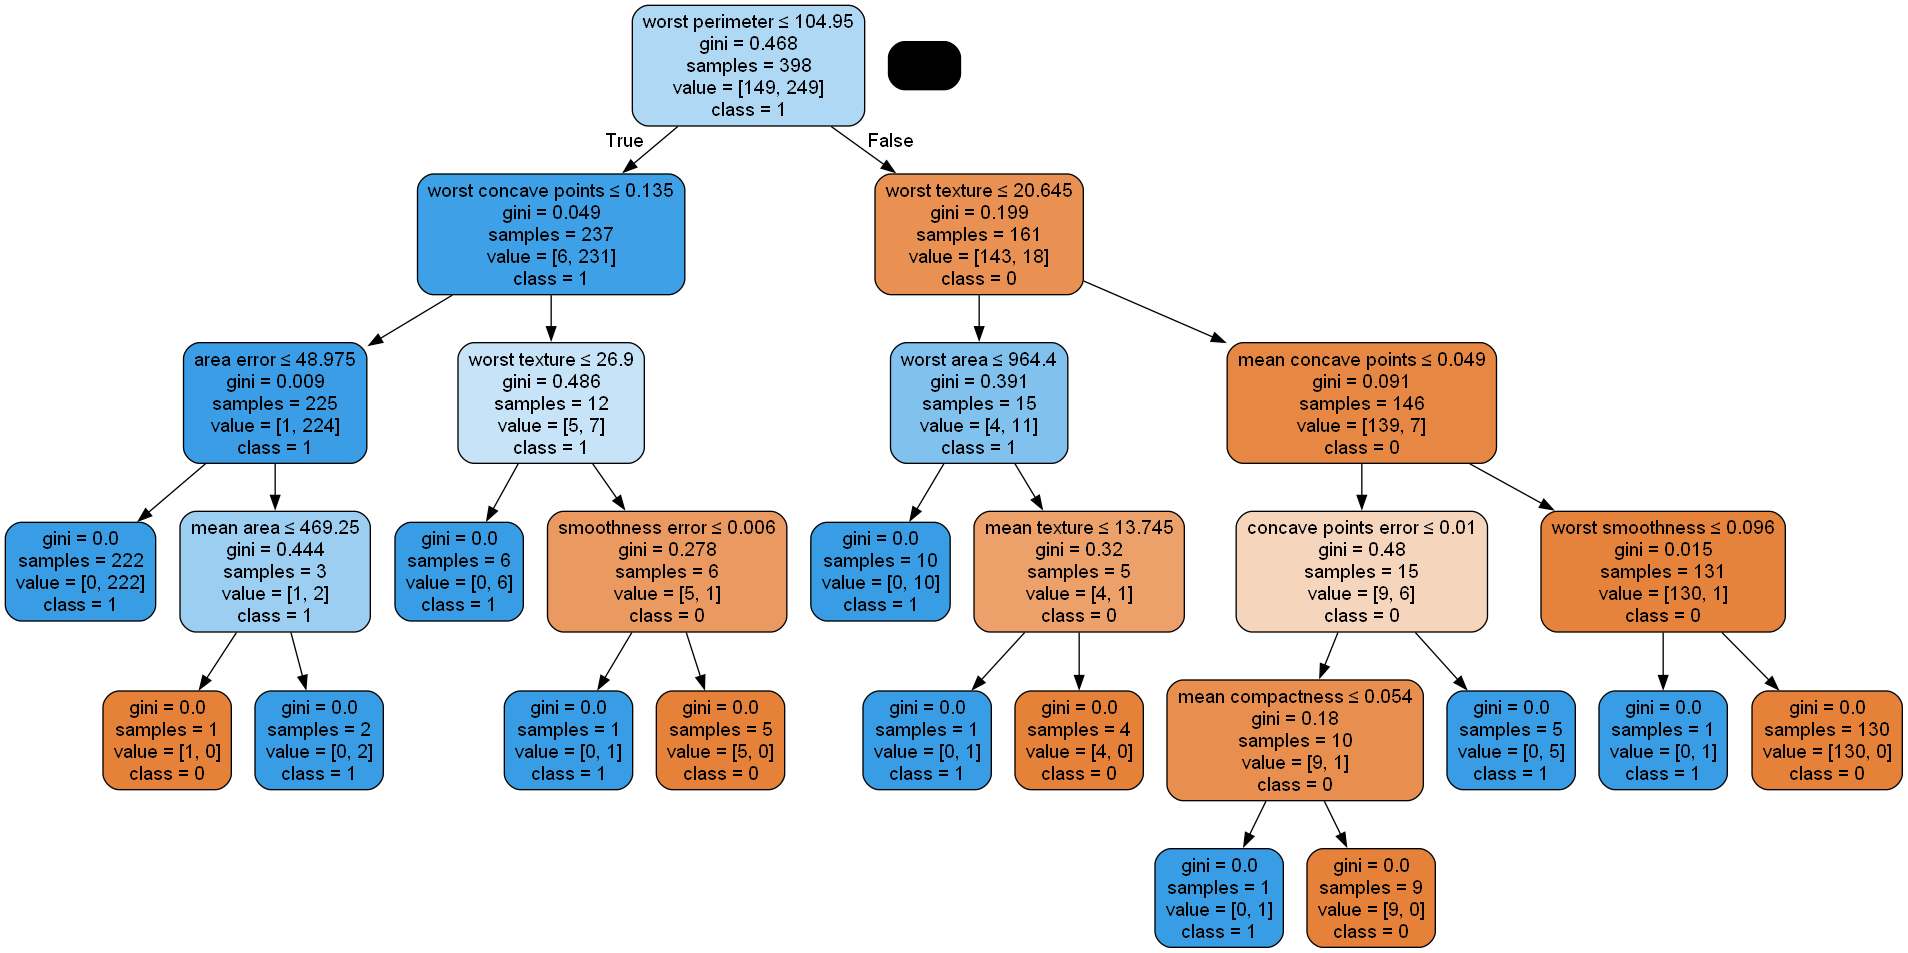

In [11]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus
 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True,
                feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Breast_cancer_decision_tree.png')
Image(graph.create_png())

### Hypter Parameter Tuning

In [12]:
tuned_parameters =  {"criterion": [ "entropy"], "max_depth": [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

In [13]:
classifier = DecisionTreeClassifier()
tuned_clf = GridSearchCV(classifier, param_grid = tuned_parameters)
tuned_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]})

In [21]:
pred_test = tuned_clf.predict(X_test)
print("BEFORE TUNING:\n")
print("RECALL\t\t",recall_score(y_test, pred_test))     
print("PRECISION\t",precision_score(y_test, pred_test))  
print("ROC_AUC\t\t",roc_auc_score(y_test, pred_test))    
print("\nACCURACY SCORE\t",metrics.accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:",confusion_matrix(y_test,pred_test),sep="\n")

BEFORE TUNING:

RECALL		 0.9351851851851852
PRECISION	 0.9181818181818182
ROC_AUC		 0.8961640211640212

ACCURACY SCORE	 0.935672514619883

CONFUSION MATRIX:
[[ 54   9]
 [  7 101]]



|                | BEFORE             | AFTER              |
|----------------|--------------------|--------------------|
| RECALL         | 0.9907407407407407 | 0.9351851851851852 |
| PRECISION      | 0.9304347826086956 | 0.9099099099099099 |
| ROC_AUC        | 0.9318783068783069 | 0.8882275132275133 |
| ACCURACY SCORE | 0.9473684210526315 | 0.935672514619883  |

\*for almost all the runs I did, except for `accuracy` every other metric worsened.
The model started performing worse!

## Random Forest Classification Model

In [31]:
estimator = RandomForestClassifier(random_state=0, warm_start = True)
estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=0, warm_start=True)

RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 2.1078

ACCURACY SCORE	 0.9415204678362573

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



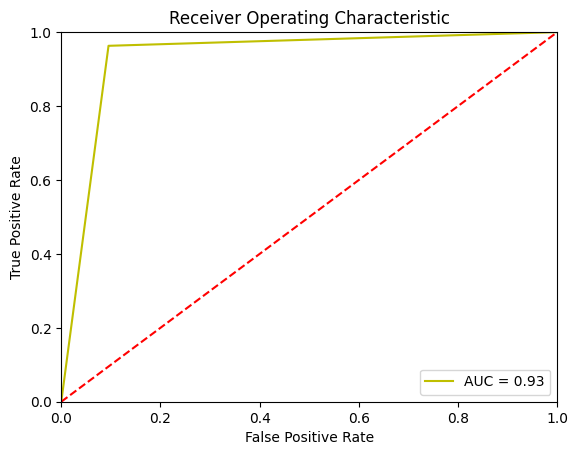

In [33]:
y_pred = estimator.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print("RECALL\t\t",recall_score(y_test, pred_test))     
print("PRECISION\t",precision_score(y_test, pred_test))  
print("ROC_AUC\t\t",roc_auc_score(y_test, pred_test))    
print('LOGLOSS Value:\t %.4f' % log_loss(y_test, y_pred))
print("\nACCURACY SCORE\t",metrics.accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:",confusion_matrix(y_test,pred_test),sep="\n")
print ('\nCLASSIFICATION REPORT: \n', classification_report(y_test, y_pred))

# Operating Chars
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting Classification Model

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)


GradientBoostingClassifier()

RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 1.4755

ACCURACY SCORE	 0.9590643274853801

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



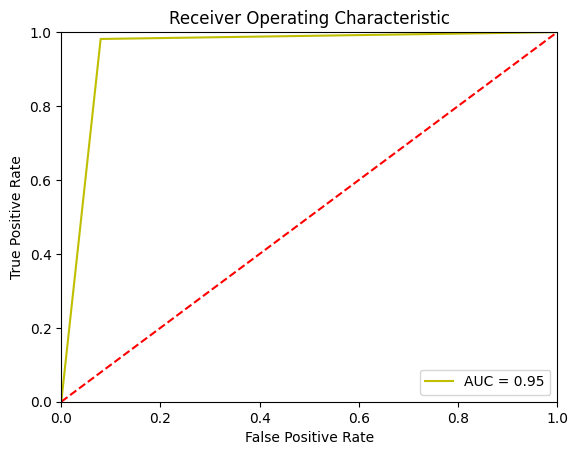

In [35]:
y_pred = gradient_booster.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print("RECALL\t\t",recall_score(y_test, pred_test))     
print("PRECISION\t",precision_score(y_test, pred_test))  
print("ROC_AUC\t\t",roc_auc_score(y_test, pred_test))    
print('LOGLOSS Value:\t %.4f' % log_loss(y_test, y_pred))
print("\nACCURACY SCORE\t",metrics.accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:",confusion_matrix(y_test,pred_test),sep="\n")
print ('\nCLASSIFICATION REPORT: \n', classification_report(y_test, y_pred))

# Operating Chars
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN Classification Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 2.3186

ACCURACY SCORE	 0.935672514619883

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



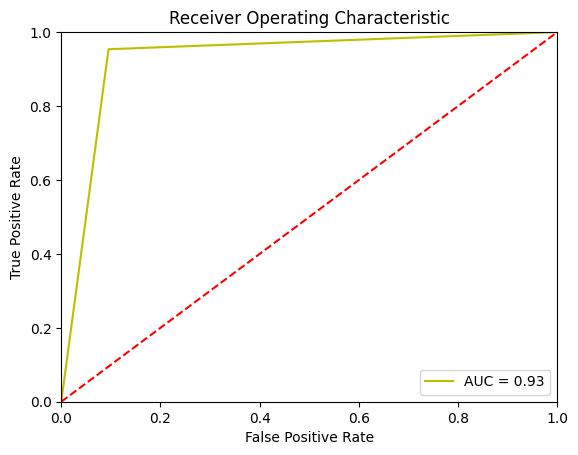

In [37]:
y_pred = knn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print("RECALL\t\t",recall_score(y_test, pred_test))     
print("PRECISION\t",precision_score(y_test, pred_test))  
print("ROC_AUC\t\t",roc_auc_score(y_test, pred_test))    
print('LOGLOSS Value:\t %.4f' % log_loss(y_test, y_pred))
print("\nACCURACY SCORE\t",metrics.accuracy_score(y_test, y_pred))
print("\nCONFUSION MATRIX:",confusion_matrix(y_test,pred_test),sep="\n")
print ('\nCLASSIFICATION REPORT: \n', classification_report(y_test, y_pred))

# Operating Chars
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion:

- the three models (RF, GB and KNN) had the same RECALL, PRECISION and CONFUSION MATRIX
- GB performed best in terms of accuracy
- Logloss value was also least in GB

### RF
```
RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 2.1078

ACCURACY SCORE	 0.9415204678362573

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171
```

### GB
```
RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 1.4755

ACCURACY SCORE	 0.9590643274853801

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171
```

### KNN
```
RECALL		 0.9722222222222222
PRECISION	 0.9130434782608695
ROC_AUC		 0.9067460317460319
LOGLOSS Value:	 2.3186

ACCURACY SCORE	 0.935672514619883

CONFUSION MATRIX:
[[ 53  10]
 [  3 105]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171
```
